In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('D:/OneDrive/egitim/verilen/bogazici-compec-python-ml/Datasets/Mall_Customers.csv')

# Veri Keşfi

In [80]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [82]:
# Boş değer yok. Veri türleri uyumlu.

In [83]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [84]:
# Aykırı değer görünmüyor.

## Sütun isimlerini değiştirme

In [85]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [86]:
new_columns = ['CustomerID', 'Genre', 'Age', 'AnnualIncome',
       'SpendingScore']

In [87]:
df.columns = new_columns
df.head()

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Analize girecek nitelikleri seçmek

In [88]:
X = df.iloc[:,1:].values

In [89]:
X[:10]

array([['Male', 19, 15, 39],
       ['Male', 21, 15, 81],
       ['Female', 20, 16, 6],
       ['Female', 23, 16, 77],
       ['Female', 31, 17, 40],
       ['Female', 22, 17, 76],
       ['Female', 35, 18, 6],
       ['Female', 23, 18, 94],
       ['Male', 64, 19, 3],
       ['Female', 30, 19, 72]], dtype=object)

# Cinsiyeti LabelEncoder ile rakamlara çevirme

In [90]:
from sklearn.preprocessing import LabelEncoder

In [91]:
label_encoder_cinsiyet = LabelEncoder()

In [92]:
X[:,0] = label_encoder_cinsiyet.fit_transform(X[:,0])

In [93]:
X[:3]

array([[1, 19, 15, 39],
       [1, 21, 15, 81],
       [0, 20, 16, 6]], dtype=object)

# Standardizasyon (Feature Scaling)

In [94]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X = scaler.fit_transform(X)

In [95]:
X[:10]

array([[1, 19, 15, 39],
       [1, 21, 15, 81],
       [0, 20, 16, 6],
       [0, 23, 16, 77],
       [0, 31, 17, 40],
       [0, 22, 17, 76],
       [0, 35, 18, 6],
       [0, 23, 18, 94],
       [1, 64, 19, 3],
       [0, 30, 19, 72]], dtype=object)

# İdeal k sayısını bulmak

In [96]:
from sklearn.cluster import KMeans

In [97]:
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    For döngüsü içinde yer alan kodlar neler yapıyor? 
    For döngüsü i değişkeniyle her dönüşünde bir artarak küme sayısını parametre olarak n_clusters’a veriyor. 
    init parametresi ise başlangıç noktalarını seçmek için ideal küme merkezlerini belirliyor, başlangıç noktası tuzağından (random initialization trap) kurtulmak için. kmeans++ parametresi bizi bu tuzaktan kurtaracak iyi başlangıç noktaları seçmemizi sağlıyor. 
    max_iter, algoritmanın nihai durumuna erişmesi için en fazla kaç iterasyon yapabileceğini belirler, varsayılan 300’tür.
    n_init ise küme merkezi başlangıç noktasının kaç farklı noktadan başlayabileceğini belirler. 
    random_state, bu işlemleri uygulayan herkesin aynı sonuçları elde etmesini sağlar. 
    fit() metodu ile model eğitimi gerçekleşir. Parametre olarak daha önce oluşturduğumuz X’i (feature matrix) veriyoruz. 
    for döngüsünden önce oluşturduğumuz wcss listesine kmeans nesnesinin inerita_ özelliğini ekliyoruz. inertia_ Within Clusters Sum of Square (WCSS)  Kümeler içi kareler toplamı.

# Dirsek Metodu (Elbow Method) ile optimal küme sayısı

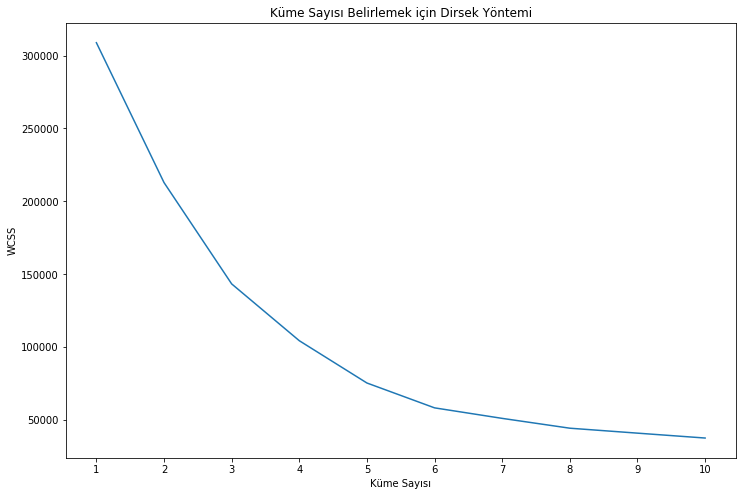

In [98]:
plt.figure(figsize=(12,8))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Küme Sayısı Belirlemek için Dirsek Yöntemi')
plt.xlabel('Küme Sayısı')
plt.xticks(kume_sayisi_listesi)
plt.ylabel('WCSS')
plt.show()

# Belirlenen küme sayısına göre kümeleme yapmak

In [99]:
# Dirsek yöntemine göre optimal k sayısı 5 görünüyor.
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

In [100]:
# kmeans nesnesini eğitip hengi müşterinin hangi kümeye dahil olduğunu bulalım.
y_kmeans = kmeans.fit_predict(X)
y_kmeans[:10]

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4])

# Kim hangi kümede?

In [101]:
# Kimin hangi kümeye düştüğü indeks diziliminden anlaşılır.
# küme merkezlerini (rakam, koordinat değil) dataframe'e ekleyelim.
df['clusters'] = y_kmeans

In [102]:
df.head()

,CustomerID,Genre,Age,AnnualIncome,SpendingScore,clusters
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0


# Küme merkezleri

In [103]:
kmeans.cluster_centers_

array([[ 0.39130435, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.41772152, 43.08860759, 55.29113924, 49.56962025],
       [ 0.52777778, 40.66666667, 87.75      , 17.58333333],
       [ 0.39130435, 25.52173913, 26.30434783, 78.56521739]])

In [64]:
# Küme merkezlerinden sadece AnnualIncome	SpendingScore değerlerini alıp orijinal değerlerine çevireceğim çünkü 
# grafiğim 2 boyutlu olacak ve bunlar AnnualIncome	SpendingScore olacak

In [72]:
# Yeni bir scaler'ı df'in orijinal nitelikleri ile eğitiyoruz.
#scaler_cluster_center = StandardScaler()
#scaler_cluster_center.fit(df.iloc[:,[3,4]])

D:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [73]:
# Yukarıda hala küme merkezleri standardize halde. Onları tekrar normal ölçeğe çekelim
# cluster_centers_two_dim_orj = scaler_cluster_center.inverse_transform(kmeans.cluster_centers_[:,[2,3]])

# Kümeleri grafikte göstermek

In [75]:
# Kümemerkezlerinin x ve y koordinatlarını ayrı listelerde tutalım
kume_merkezleri_x = cluster_centers_two_dim_orj[:,0]
kume_merkezleri_y = cluster_centers_two_dim_orj[:,1]

In [76]:
# her bir kümeyi ayrı bir dataframe içinde toplayalım
kume_1 = df[df['clusters'] == 0]
kume_2 = df[df['clusters'] == 1]
kume_3 = df[df['clusters'] == 2]
kume_4 = df[df['clusters'] == 3]
kume_5 = df[df['clusters'] == 4]
kume_1.head()

,CustomerID,Genre,Age,AnnualIncome,SpendingScore,clusters
3,4,Female,23,16,77,0
5,6,Female,22,17,76,0
7,8,Female,23,18,94,0
9,10,Female,30,19,72,0
11,12,Female,35,19,99,0


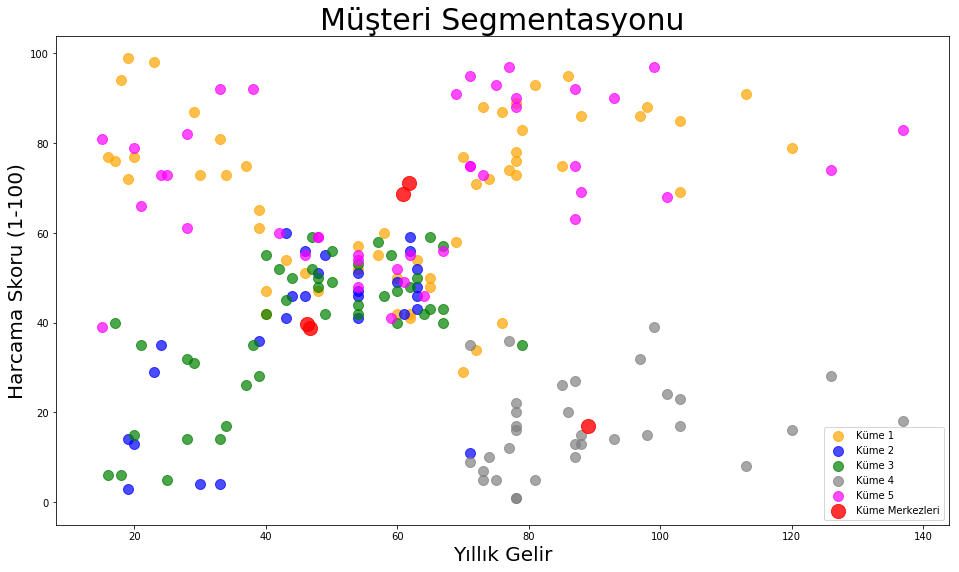

In [77]:
# kanvas genişliği
plt.figure(figsize=(16,9))
# Küme-X için x eksenine gelir, y eksenine harcama skoru olacak şekilde saçılma diyagramı. s: daire genişliği
# c: renk, alpha ise saydamlık derecesi
plt.scatter(x=kume_1.AnnualIncome, y=kume_1.SpendingScore, s = 100, c = 'orange', label = 'Küme 1', alpha=0.7)
plt.scatter(x=kume_2.AnnualIncome, y=kume_2.SpendingScore, s = 100, c = 'blue', label = 'Küme 2', alpha=0.7)
plt.scatter(x=kume_3.AnnualIncome, y=kume_3.SpendingScore, s = 100, c = 'green', label = 'Küme 3', alpha=0.7)
plt.scatter(x=kume_4.AnnualIncome, y=kume_4.SpendingScore, s = 100, c = 'grey', label = 'Küme 4', alpha=0.7)
plt.scatter(x=kume_5.AnnualIncome, y=kume_5.SpendingScore, s = 100, c = 'magenta', label = 'Küme 5', alpha=0.7)

# Küme merkezlerine ait koordinatlarım elimde var onları da gösterelim.
plt.scatter(x=kume_merkezleri_x, y=kume_merkezleri_y, s = 200, 
            c = 'red', label = 'Küme Merkezleri', alpha=0.8)
plt.title('Müşteri Segmentasyonu',fontsize = 30)
plt.xlabel('Yıllık Gelir',fontsize = 20)
plt.ylabel('Harcama Skoru (1-100)',fontsize = 20)
plt.legend()
plt.show()

# Alternatif Grafik: Yöntem-2 (Standardizasyonu bozmadan)

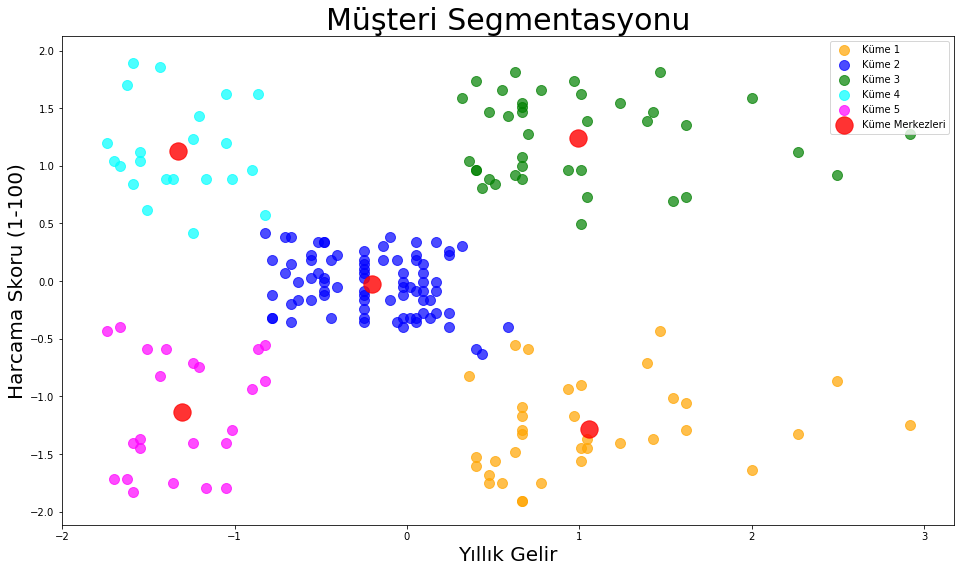

In [27]:
# kanvas genişliği
plt.figure(figsize=(16,9))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'orange', label = 'Küme 1', alpha=0.7)
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Küme 2', alpha=0.7)
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Küme 3', alpha=0.7)
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Küme 4', alpha=0.7)
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Küme 5', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, 
            c = 'red', label = 'Küme Merkezleri', alpha=0.8)
plt.title('Müşteri Segmentasyonu',fontsize = 30)
plt.xlabel('Yıllık Gelir',fontsize = 20)
plt.ylabel('Harcama Skoru (1-100)',fontsize = 20)
plt.legend()
plt.show()